Table of contents
1. [Census Data: Demographic & Shapefile](#census)
2. [Precinct Shapefile](#shapefile)
3. [Legislative Boundaries](#legislative)
4. [Election Results](#electionresults)
5. [Joining Election Results to Precinct Shapefile](#joining)
6. [Comparison to MGGG](#comparison)

**Import Python Packages**

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geopandas as gp
import pathlib
import matplotlib.pyplot as plt
import maup
import requests

# Census Data: Demographic & Shapefile

Run the `get_2010_boundary_bg_b.ipynb` script. This script queries the Census API for demographic data and TIGER/LINE shapefiles from the 2010 U.S. Census. 
Developed by Spencer Nelson from the RDH. 

Move the shapefile that Spencer's script makes to the `raw-from-source` directory. 

Load in the shapefile that is generated by the script. 

In [3]:
demo_block = gp.read_file("./raw-from-source/b_demographics_2010/oh_2010_b_demographics.shp")

In [4]:
demo_block.columns

Index(['GEOID', 'NAME', 'STATE', 'COUNTY', 'P001001', 'P005003', 'P005004',
       'P005005', 'P005006', 'P005007', 'P005008', 'P005009', 'P005010',
       'P005011', 'P005012', 'P005013', 'P005014', 'P005015', 'P005016',
       'P005017', 'P011001', 'P011002', 'P011005', 'P011006', 'P011007',
       'P011008', 'P011009', 'P011010', 'P011011', 'STATEFP', 'COUNTYFP',
       'TRACTCE', 'BLOCKCE', 'ALAND', 'AWATER', 'geometry'],
      dtype='object')

Rename columns to match MGGG's

In [5]:
demo_block.columns = ['GEOID', 'NAME', 'STATE', 'COUNTY', 
    "TOTPOP","NH_WHITE","NH_BLACK","NH_AMIN","NH_ASIAN","NH_NHPI","NH_OTHER","NH_2MORE",
    "HISP","H_WHITE","H_BLACK","H_AMIN ","H_ASIAN","H_NHPI ","H_OTHER","H_2MORE",
    "VAP","HVAP","WVAP","BVAP","AMINVAP","ASIANVAP","NHPIVAP","OTHERVAP","2MOREVAP",
    'STATEFP', 'COUNTYFP','TRACTCE', 'BLOCKCE', 'ALAND', 'AWATER', 'geometry']

Check that the file looks good:

In [6]:
demo_block.head(3)

,GEOID,NAME,STATE,COUNTY,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,...,NHPIVAP,OTHERVAP,2MOREVAP,STATEFP,COUNTYFP,TRACTCE,BLOCKCE,ALAND,AWATER,geometry
0,390017705001082,"Block 1082, Block Group 1, Census Tract 7705, ...",Ohio,Adams County,6,6,0,0,0,0,...,0,0,0,39,001,770500,1082,2973633,0,"POLYGON ((-83.36658 38.83729, -83.36682 38.837..."
1,390017705001059,"Block 1059, Block Group 1, Census Tract 7705, ...",Ohio,Adams County,6,6,0,0,0,0,...,0,0,0,39,001,770500,1059,241797,0,"POLYGON ((-83.38999 38.83669, -83.38999 38.836..."
2,390017705001053,"Block 1053, Block Group 1, Census Tract 7705, ...",Ohio,Adams County,1,1,0,0,0,0,...,0,0,0,39,001,770500,1053,222386,0,"POLYGON ((-83.36013 38.83612, -83.36015 38.836..."


In [7]:
demo_block.shape

(365344, 36)

In [8]:
demo_block.TOTPOP.sum()

11536504

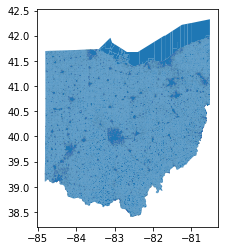

In [9]:
demo_block.plot()

<a name="shapefile"></a>


# Precinct Shapefile

## Load Precinct Shapefile

Read in the precinct shapefile that is from [MGGG OH-precincts](https://github.com/mggg/ohio-precincts/blob/master/OH_precincts.zip)

In [10]:
precincts = gp.read_file("./raw-from-source/mggg_OH_precincts_shapefile/OH_precincts.shp")

In [11]:
precincts.shape

(8882, 50)

In [12]:
precincts.head(3)

,CNTYFIPS,COUNTY,CODE,PRECODE,PRECINCT,PRENAME,TOTREG16,TOTVOTE16,TURNOUT16,PRES16R,...,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,CD,SEND,HDIST,geometry
0,001,Adams,AAA,001-AAA,Bratton Township,BRATTON TOWNSHIP,923,661,0.716143,532,...,0.0,9.0,3.0,0.0,0.0,11.0,02,014,090,"POLYGON ((291287.968 4317229.468, 291132.191 4..."
1,001,Adams,AAB,001-AAB,Brush Creek Township,BRUSH CREEK TOWNSHIP,768,514,0.669271,390,...,2.0,5.0,1.0,0.0,1.0,15.0,02,014,090,"POLYGON ((285518.544 4290611.719, 285411.226 4..."
2,001,Adams,AAE,001-AAE,Green Township,GREEN TOWNSHIP,409,259,0.633252,176,...,1.0,7.0,0.0,0.0,0.0,8.0,02,014,090,"POLYGON ((302584.162 4279265.355, 302583.981 4..."


In [13]:
precincts.columns

Index(['CNTYFIPS', 'COUNTY', 'CODE', 'PRECODE', 'PRECINCT', 'PRENAME',
       'TOTREG16', 'TOTVOTE16', 'TURNOUT16', 'PRES16R', 'PRES16D', 'PRES16L',
       'PRES16G', 'SEN16R', 'SEN16D', 'USH16R', 'USH16D', 'SSEN16R', 'SSEN16D',
       'STH16D', 'STH16R', 'TOTPOP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN',
       'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE',
       'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER', 'H_2MORE', 'VAP',
       'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP',
       '2MOREVAP', 'CD', 'SEND', 'HDIST', 'geometry'],
      dtype='object')

So the "raw" precinct shapefile actually is the same thing as MGGG's final shapefile on mggg-states. 

Drop all of the vote, demo, and boundary columns in `precincts` and we will try to remake it. 

In [14]:
precincts.drop(columns = ['TOTREG16', 'TOTVOTE16', 'TURNOUT16', 'PRES16R', 'PRES16D', 'PRES16L',
       'PRES16G', 'SEN16R', 'SEN16D', 'USH16R', 'USH16D', 'SSEN16R', 'SSEN16D',
       'STH16D', 'STH16R', 'TOTPOP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN',
       'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE',
       'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER', 'H_2MORE', 'VAP',
       'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP',
       '2MOREVAP', 'CD', 'SEND', 'HDIST'], inplace = True)

In [15]:
precincts.head(3)

,CNTYFIPS,COUNTY,CODE,PRECODE,PRECINCT,PRENAME,geometry
0,001,Adams,AAA,001-AAA,Bratton Township,BRATTON TOWNSHIP,"POLYGON ((291287.968 4317229.468, 291132.191 4..."
1,001,Adams,AAB,001-AAB,Brush Creek Township,BRUSH CREEK TOWNSHIP,"POLYGON ((285518.544 4290611.719, 285411.226 4..."
2,001,Adams,AAE,001-AAE,Green Township,GREEN TOWNSHIP,"POLYGON ((302584.162 4279265.355, 302583.981 4..."


In [16]:
precincts.shape

(8882, 7)

## Load MGGG's Final File

In [17]:
mggg_final_shp = gp.read_file("./raw-from-source/mggg_OH_precincts/OH_precincts.shp")

In [18]:
mggg_final_shp.shape

(8882, 50)

In [19]:
mggg_final_shp.head(3)

,CNTYFIPS,COUNTY,CODE,PRECODE,PRECINCT,PRENAME,TOTREG16,TOTVOTE16,TURNOUT16,PRES16R,...,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,CD,SEND,HDIST,geometry
0,001,Adams,AAA,001-AAA,Bratton Township,BRATTON TOWNSHIP,923,661,0.716143,532,...,0.0,9.0,3.0,0.0,0.0,11.0,02,014,090,"POLYGON ((291287.968 4317229.468, 291132.191 4..."
1,001,Adams,AAB,001-AAB,Brush Creek Township,BRUSH CREEK TOWNSHIP,768,514,0.669271,390,...,2.0,5.0,1.0,0.0,1.0,15.0,02,014,090,"POLYGON ((285518.544 4290611.719, 285411.226 4..."
2,001,Adams,AAE,001-AAE,Green Township,GREEN TOWNSHIP,409,259,0.633252,176,...,1.0,7.0,0.0,0.0,0.0,8.0,02,014,090,"POLYGON ((302584.162 4279265.355, 302583.981 4..."


## Assign Block-Level Census Data to Precincts
Demographic and Voting Pop Data from Block Level to Precinct Level

In [20]:
precincts.crs

<Projected CRS: EPSG:3747>
Name: NAD83(HARN) / UTM zone 17N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: USA - 84°W to 78°W onshore
- bounds: (-84.01, 24.41, -78.0, 46.13)
Coordinate Operation:
- name: UTM zone 17N
- method: Transverse Mercator
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
proj = precincts.crs
precincts = precincts.to_crs(proj)

In [22]:
demo_block = demo_block.to_crs(proj)

In [23]:
demo_block.columns = demo_block.columns.str.strip()

In [24]:
precincts.head(1)

,CNTYFIPS,COUNTY,CODE,PRECODE,PRECINCT,PRENAME,geometry
0,001,Adams,AAA,001-AAA,Bratton Township,BRATTON TOWNSHIP,"POLYGON ((291287.968 4317229.468, 291132.191 4..."


In [25]:
precincts['geometry'] = precincts.buffer(0)

In [26]:
demo_block['geometry']=demo_block.buffer(0)

In [30]:
precincts.columns

Index(['CNTYFIPS', 'COUNTY', 'CODE', 'PRECODE', 'PRECINCT', 'PRENAME',
       'geometry'],
      dtype='object')

In [31]:
precincts.set_index('PRECODE',inplace = True)

In [32]:
demo_block.columns

Index(['GEOID', 'NAME', 'STATE', 'COUNTY', 'TOTPOP', 'NH_WHITE', 'NH_BLACK',
       'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'HISP',
       'H_WHITE', 'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER',
       'H_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP',
       'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'BLOCKCE', 'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [33]:
demo_block.set_index('GEOID',inplace=True)

Using maup `assign` gives the following error: 

`cannot reindex from a duplicate axis`

This is caused by geographical features overlap, due to water or places where blocks don't nest neatly. We can use maup `intersections` instead, but then we have to re-assign the pieces. See [maup documentation](https://github.com/mggg/maup) for more info. There is also an example of this in [RDH's PDV for MGGG-AZ](https://github.com/nonpartisan-redistricting-datahub/data-integrity/tree/master/mggg-az). 

In [34]:
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)

demo_variables = ['TOTPOP','NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 
             'NH_NHPI', 'NH_OTHER','NH_2MORE', 'HISP', 'VAP', 'HVAP', 
             'WVAP', 'BVAP', 'AMINVAP','ASIANVAP', 'NHPIVAP', 'OTHERVAP', 
             '2MOREVAP'] 

demographic_precinct = maup.intersections(demo_block, precincts, area_cutoff = 0)

In [35]:
weights = demographic_precinct.area / demographic_precinct.index.get_level_values("source").map(demo_block.area)

In [36]:
precincts[demo_variables] = maup.prorate(demographic_precinct,  demo_block[demo_variables].astype(float), weights)

In [37]:
precincts.head(2)

,CNTYFIPS,COUNTY,CODE,PRECINCT,PRENAME,geometry,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,...,HISP,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP
PRECODE,,,,,,,,,,,,,,,,,,,,,
001-AAA,001,Adams,AAA,Bratton Township,BRATTON TOWNSHIP,"POLYGON ((291287.968 4317229.468, 291132.191 4...",1461.0,1417.0,1.0,10.0,...,8.0,1087.0,5.0,1059.0,0.0,9.0,3.0,0.000000e+00,0.0,11.0
001-AAB,001,Adams,AAB,Brush Creek Township,BRUSH CREEK TOWNSHIP,"POLYGON ((285518.544 4290611.719, 285411.226 4...",1236.0,1202.0,2.0,6.0,...,5.0,954.0,2.0,928.0,2.0,5.0,1.0,5.605919e-10,1.0,15.0


In [38]:
precincts.TOTPOP.sum()

11540066.769732855

In [39]:
precincts.NH_WHITE.sum()

9362209.18001771

Comparing to mggg's race fields

In [40]:
mggg_final_shp = mggg_final_shp.to_crs(proj)

In [41]:
mggg_final_shp.NH_WHITE.sum()

9359246.0

In [42]:
mggg_final_shp.TOTPOP.sum()

11536487.0

So the population is similar but just a little off from MGGG's. This seems ok. 

<a name="legislative"></a>


# Legislative Boundaries

## Assign the state senate districts

MGGG doesn't specify their source for the legislative boundaries. We started by downloading the 2013 TIGER/LINE boundaries, as redistricting finished in OH in 2012. Loading and looking at these:

In [44]:
senate_districts = gp.read_file("./raw-from-source/legislative_boundaries/tl_2012_39_sldu/tl_2012_39_sldu.shp")

In [45]:
senate_districts = senate_districts.to_crs(proj)

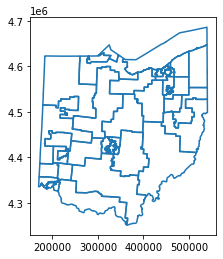

In [46]:
senate_districts.boundary.plot()

These do not look like what the current state senate districts are on the [OH website](https://www.ohiosenate.gov/senators/district-map). However, the map on the website is only a Google Map and it doesn't look like there's an option to download it. 

Tried calling the OH SOS to find the shapefile version and they hung up (1/29/2021). 

Let's try loading in the districts file that Justin Levitt linked on his site. [Link to download](https://opendata.arcgis.com/datasets/33d1449c947a4b27a4b36b026d8c14d0_0.zip). 

In [47]:
senate_districts = gp.read_file("./raw-from-source/legislative_boundaries/Ohio_Senate_Districts-shp/Ohio_Senate_Districts.shp")

In [48]:
senate_districts.sample(3)

,OBJECTID,DISTRICT,POPULATION,DEVIATION,F_DEVIATIO,SQ_MI,geometry
22,23,23,336602.94,-12988.0566,-0.0372,81.478101,"POLYGON ((-81.63813 41.41751, -81.63827 41.417..."
23,24,24,356285.71,6694.7099,0.0192,235.997265,"POLYGON ((-81.96829 41.50520, -81.96804 41.505..."
20,21,21,355294.83,5703.8287,0.0163,71.236406,"POLYGON ((-81.58475 41.38456, -81.58604 41.385..."


In [49]:
senate_districts = senate_districts.to_crs(proj)

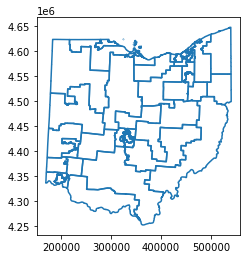

In [50]:
senate_districts.boundary.plot()

Add string padding to the district numbers so they match MGGG's

In [51]:
senate_districts['DISTRICT'] = senate_districts['DISTRICT'].apply(lambda x: x.zfill(3))

In [52]:
senate_districts.set_index('DISTRICT', inplace = True)

In [53]:
senate_districts.sort_index(inplace = True)

In [54]:
senate_districts.head(3)

,OBJECTID,POPULATION,DEVIATION,F_DEVIATIO,SQ_MI,geometry
DISTRICT,,,,,,
001,1,338361.67,-11229.3330,-0.0321,3897.990831,"POLYGON ((258100.605 4490553.786, 258093.256 4..."
002,2,359414.96,9823.9582,0.0281,1633.978163,"MULTIPOLYGON (((216929.148 4615350.326, 216929..."
003,3,340919.40,-8671.6001,-0.0248,202.800794,"POLYGON ((332292.674 4417416.120, 332335.972 4..."


In [55]:
assignments = maup.assign(precincts, senate_districts)

In [56]:
assignments.unique()

array(['014', '012', '022', '032', '020', '030', '001', '004', '007',
       '010', '017', '033', '031', '024', '025', '023', '021', '005',
       '019', '002', '015', '003', '016', '018', '009', '008', '013',
       '011', '026', '006', '027', '029', '028'], dtype=object)

In [57]:
# Assign the CDs to the precincts shapefile
precincts["SEN_DIST"] = assignments

In [58]:
# Confirm what it looks like and that the SD assignment is correct by looking up some counties
precincts.sample()

,CNTYFIPS,COUNTY,CODE,PRECINCT,PRENAME,geometry,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,...,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,SEN_DIST
PRECODE,,,,,,,,,,,,,,,,,,,,,
095-AQI,095,Lucas,AQI,City of Toledo 23 23C,TOLEDO 23C,"POLYGON ((282160.898 4622305.598, 282162.518 4...",1829.545108,1583.504743,94.991491,9.003113,...,1356.138164,50.993783,1203.137432,65.996991,9.003113,8.99782,0.0,2.001939,16.007086,011


Checked 5 random precincts in different senate districts and they all spot checked correctly. Now compare to MGGG's senate districts:

In [59]:
overlap = precincts.merge(mggg_final_shp, how = 'left', on = 'PRECODE')

In [60]:
overlap.head(1)

,PRECODE,CNTYFIPS_x,COUNTY_x,CODE_x,PRECINCT_x,PRENAME_x,geometry_x,TOTPOP_x,NH_WHITE_x,NH_BLACK_x,...,BVAP_y,AMINVAP_y,ASIANVAP_y,NHPIVAP_y,OTHERVAP_y,2MOREVAP_y,CD,SEND,HDIST,geometry_y
0,001-AAA,001,Adams,AAA,Bratton Township,BRATTON TOWNSHIP,"POLYGON ((291287.968 4317229.468, 291132.191 4...",1461.0,1417.0,1.0,...,0.0,9.0,3.0,0.0,0.0,11.0,02,014,090,"POLYGON ((291287.968 4317229.468, 291132.191 4..."


In [61]:
overlap.columns

Index(['PRECODE', 'CNTYFIPS_x', 'COUNTY_x', 'CODE_x', 'PRECINCT_x',
       'PRENAME_x', 'geometry_x', 'TOTPOP_x', 'NH_WHITE_x', 'NH_BLACK_x',
       'NH_AMIN_x', 'NH_ASIAN_x', 'NH_NHPI_x', 'NH_OTHER_x', 'NH_2MORE_x',
       'HISP_x', 'VAP_x', 'HVAP_x', 'WVAP_x', 'BVAP_x', 'AMINVAP_x',
       'ASIANVAP_x', 'NHPIVAP_x', 'OTHERVAP_x', '2MOREVAP_x', 'SEN_DIST',
       'CNTYFIPS_y', 'COUNTY_y', 'CODE_y', 'PRECINCT_y', 'PRENAME_y',
       'TOTREG16', 'TOTVOTE16', 'TURNOUT16', 'PRES16R', 'PRES16D', 'PRES16L',
       'PRES16G', 'SEN16R', 'SEN16D', 'USH16R', 'USH16D', 'SSEN16R', 'SSEN16D',
       'STH16D', 'STH16R', 'TOTPOP_y', 'NH_WHITE_y', 'NH_BLACK_y', 'NH_AMIN_y',
       'NH_ASIAN_y', 'NH_NHPI_y', 'NH_OTHER_y', 'NH_2MORE_y', 'HISP_y',
       'H_WHITE', 'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER',
       'H_2MORE', 'VAP_y', 'HVAP_y', 'WVAP_y', 'BVAP_y', 'AMINVAP_y',
       'ASIANVAP_y', 'NHPIVAP_y', 'OTHERVAP_y', '2MOREVAP_y', 'CD', 'SEND',
       'HDIST', 'geometry_y'],
      dtype=

In [62]:
overlap[['SEN_DIST', 'SEND']].assign(NOTEQUAL=overlap.SEN_DIST != overlap.SEND)['NOTEQUAL'].sum()

3

In [63]:
ne = overlap[['PRECODE','PRECINCT_x','PRENAME_x','COUNTY_x','SEN_DIST', 'SEND']].assign(NOTEQUAL=overlap.SEN_DIST != overlap.SEND)
ne.loc[ne['NOTEQUAL'] == True]


,PRECODE,PRECINCT_x,PRENAME_x,COUNTY_x,SEN_DIST,SEND,NOTEQUAL
2420,043-ADX,SANDUSKY-A,PRECINCT SAN A,Erie,002,ZZZ,True
2779,049-AHX,COLUMBUS 38-B,COLS 38-B,Franklin,015,003,True
2854,049-AKR,COLUMBUS 50-C,COLS 50-C,Franklin,015,003,True


This looks way better. Not sure why we would only be 3 precincts off but going to move on. 

## Assign the state house districts

Let's try loading in the districts file that Justin Levitt linked on his site. [Link to download](https://opendata.arcgis.com/datasets/5c1449de4d2b43658afc0937111de7da_1.zip). 

In [64]:
house_districts = gp.read_file("./raw-from-source/legislative_boundaries/Ohio_House_Districts-shp/Ohio_House_Districts.shp")

In [65]:
house_districts = house_districts.to_crs(proj)

Spot check how this looks against [OH website](https://www.ohiohouse.gov/members/district-map)

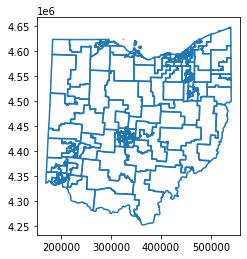

In [66]:
house_districts.boundary.plot()

Looks the same based on a spot check...

In [67]:
house_districts.sample(3)

,OBJECTID,ID,gisscGISSC,DISTRICT,MEMBERS,LOCKED,NAME,POPULATION,IDEAL_VALU,DEVIATION,F_DEVIATIO,SQ_MI,geometry
89,90,90,1218.46,90,1,None,None,122270.00,116530,5740.0000,0.0493,1219.395469,"POLYGON ((264541.178 4280357.413, 264554.700 4..."
90,91,91,1507.80,91,1,None,None,122263.00,116530,5733.0000,0.0492,1508.951879,"POLYGON ((268587.334 4322444.535, 268529.424 4..."
18,19,19,60.93,19,1,None,None,112092.36,116530,-4437.6406,-0.0381,60.997097,"POLYGON ((341693.956 4432574.762, 341632.176 4..."


Add string padding to the district ID

In [68]:
house_districts['DISTRICT'] = house_districts['DISTRICT'].apply(lambda x: x.zfill(3))

In [69]:
house_districts.set_index('DISTRICT', inplace = True)

In [70]:
house_districts.sort_index(inplace = True)

In [71]:
house_districts.head(3)

,OBJECTID,ID,gisscGISSC,MEMBERS,LOCKED,NAME,POPULATION,IDEAL_VALU,DEVIATION,F_DEVIATIO,SQ_MI,geometry
DISTRICT,,,,,,,,,,,,
001,1,1,556.12,1,None,None,114520.0,116530,-2009.9998,-0.0172,557.102672,"POLYGON ((425977.080 4537915.053, 426409.905 4..."
002,2,2,499.45,1,None,None,124475.0,116530,7945.0000,0.0682,500.308320,"POLYGON ((354929.356 4539706.372, 354939.111 4..."
003,3,3,619.68,1,None,None,125488.0,116530,8958.0000,0.0769,621.203288,"POLYGON ((258292.488 4561390.505, 258296.314 4..."


In [72]:
assignments = maup.assign(precincts, house_districts)

In [73]:
assignments.unique()

array(['090', '004', '070', '064', '099', '078', '094', '082', '084',
       '096', '095', '066', '051', '052', '053', '054', '085', '079',
       '074', '065', '091', '005', '072', '016', '008', '012', '007',
       '015', '006', '014', '010', '011', '009', '013', '080', '067',
       '068', '089', '077', '092', '018', '019', '024', '020', '022',
       '025', '026', '017', '021', '023', '047', '081', '093', '076',
       '073', '097', '027', '031', '032', '033', '029', '030', '028',
       '083', '098', '057', '061', '060', '071', '056', '055', '046',
       '045', '044', '059', '058', '086', '087', '069', '040', '039',
       '041', '043', '042', '075', '002', '088', '038', '050', '048',
       '049', '034', '035', '036', '037', '063', '062', '001', '003'],
      dtype=object)

In [74]:
# Assign the CDs to the precincts shapefile
precincts["H_DIST"] = assignments

In [75]:
# Confirm what it looks like and that the HD assignment is correct by looking up some counties
precincts.sample()

,CNTYFIPS,COUNTY,CODE,PRECINCT,PRENAME,geometry,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,...,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,SEN_DIST,H_DIST
PRECODE,,,,,,,,,,,,,,,,,,,,,
061-BIZ,061,Hamilton,BIZ,HARR TWP AA,HARR TWP AA,"MULTIPOLYGON (((175258.127 4354135.079, 175233...",930.130382,920.127379,0.999855,0.0,...,1.001273,771.0748,0.999855,0.0,1.999709,0.0,0.0,1.0,008,029


In [76]:
overlap = precincts.merge(mggg_final_shp, how = 'left', on = 'PRECODE')

In [77]:
overlap[['H_DIST', 'HDIST']].assign(NOTEQUAL=overlap.H_DIST != overlap.HDIST)['NOTEQUAL'].sum()

4

In [78]:
ne = overlap[['PRECODE','PRECINCT_x','PRENAME_x','COUNTY_x','H_DIST', 'HDIST']].assign(NOTEQUAL=overlap.H_DIST != overlap.HDIST)
ne.loc[ne['NOTEQUAL'] == True]


,PRECODE,PRECINCT_x,PRENAME_x,COUNTY_x,H_DIST,HDIST,NOTEQUAL
1876,035-CEF,NORTH OLMSTED-03-B,NORTH OLMSTED-03-B,Cuyahoga,016,007,True
2420,043-ADX,SANDUSKY-A,PRECINCT SAN A,Erie,089,ZZZ,True
2779,049-AHX,COLUMBUS 38-B,COLS 38-B,Franklin,018,017,True
2854,049-AKR,COLUMBUS 50-C,COLS 50-C,Franklin,026,017,True


Alright so only 4 precincts off for house districts. Seems pretty good again, moving on. 

## Assign the congressional districts

Trying out the CD file from TIGER/LINE

In [80]:
congressional_districts = gp.read_file("./raw-from-source/legislative_boundaries/tl_2012_us_cd112/tl_2012_us_cd112.shp")

In [81]:
congressional_districts = congressional_districts.loc[congressional_districts['STATEFP'] == '39']

In [82]:
congressional_districts = congressional_districts.to_crs(proj)

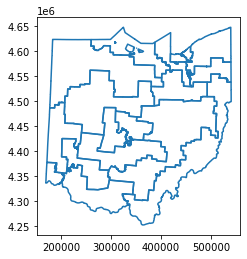

In [83]:
congressional_districts.boundary.plot()

In [84]:
congressional_districts.sample(3)

,STATEFP,CD112FP,GEOID,NAMELSAD,LSAD,CDSESSN,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
101,39,07,3907,Congressional District 7,C2,112,G5200,N,7352917759,64333286,+39.7013734,-083.1427798,"POLYGON ((233762.432 4399783.317, 233767.162 4..."
117,39,11,3911,Congressional District 11,C2,112,G5200,N,348375198,1725902,+41.4922876,-081.5536618,"MULTIPOLYGON (((446308.529 4598512.754, 446422..."
96,39,08,3908,Congressional District 8,C2,112,G5200,N,5204306402,54519307,+39.9546666,-084.5217596,"POLYGON ((177567.857 4486362.468, 177660.602 4..."


In [85]:
congressional_districts.set_index('CD112FP', inplace = True)

In [86]:
congressional_districts.sort_index(inplace = True)

In [87]:
congressional_districts.head(3)

,STATEFP,GEOID,NAMELSAD,LSAD,CDSESSN,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
CD112FP,,,,,,,,,,,,
01,39,3901,Congressional District 1,C2,112,G5200,N,1077839230,11376503,+39.2664410,-084.6437078,"POLYGON ((171979.843 4376709.187, 172697.122 4..."
02,39,3902,Congressional District 2,C2,112,G5200,N,6753302547,62454766,+38.9795877,-083.6391722,"POLYGON ((196148.691 4334248.508, 196153.016 4..."
03,39,3903,Congressional District 3,C2,112,G5200,N,4129818916,40681032,+39.4333408,-083.9156654,"POLYGON ((202103.926 4424528.726, 202181.867 4..."


In [88]:
assignments = maup.assign(precincts, congressional_districts)

In [89]:
assignments.unique()

array(['02', '04', '16', '05', '14', '18', '06', '08', '01', '07', '03',
       '10', '11', '13', '12', '09', '15', '17'], dtype=object)

In [90]:
# Assign the CDs to the precincts shapefile
precincts["CONGRESSIONAL_DISTRICTS"] = assignments

In [91]:
# Confirm what it looks like and that the HD assignment is correct by looking up some counties
precincts.sample()

,CNTYFIPS,COUNTY,CODE,PRECINCT,PRENAME,geometry,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,...,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,SEN_DIST,H_DIST,CONGRESSIONAL_DISTRICTS
PRECODE,,,,,,,,,,,,,,,,,,,,,
029-ABB,029,Columbiana,ABB,Salem City 1B,PRECINCT SALEM CITY 1-B,"POLYGON ((513018.809 4529035.216, 513016.625 4...",1154.999637,1124.999638,4.0,2.0,...,879.999687,3.0,2.0,2.0,0.0,0.0,3.999999,033,005,06


In [92]:
overlap = precincts.merge(mggg_final_shp, how = 'left', on = 'PRECODE')

In [93]:
overlap.head(1)

,PRECODE,CNTYFIPS_x,COUNTY_x,CODE_x,PRECINCT_x,PRENAME_x,geometry_x,TOTPOP_x,NH_WHITE_x,NH_BLACK_x,...,BVAP_y,AMINVAP_y,ASIANVAP_y,NHPIVAP_y,OTHERVAP_y,2MOREVAP_y,CD,SEND,HDIST,geometry_y
0,001-AAA,001,Adams,AAA,Bratton Township,BRATTON TOWNSHIP,"POLYGON ((291287.968 4317229.468, 291132.191 4...",1461.0,1417.0,1.0,...,0.0,9.0,3.0,0.0,0.0,11.0,02,014,090,"POLYGON ((291287.968 4317229.468, 291132.191 4..."


In [94]:
overlap[['CONGRESSIONAL_DISTRICTS', 'CD']].assign(NOTEQUAL=overlap.CONGRESSIONAL_DISTRICTS != overlap.CD)['NOTEQUAL'].sum()

4566

In [95]:
ne = overlap[['PRECODE','PRECINCT_x','PRENAME_x','COUNTY_x','CONGRESSIONAL_DISTRICTS', 'CD']].assign(NOTEQUAL=overlap.CONGRESSIONAL_DISTRICTS != overlap.CD)
ne.loc[ne['NOTEQUAL'] == True]


,PRECODE,PRECINCT_x,PRENAME_x,COUNTY_x,CONGRESSIONAL_DISTRICTS,CD,NOTEQUAL
109,005-AAF,Ashland City 1-E,ASHLAND CITY 1-E,Ashland,16,07,True
110,005-AAA,ASHLAND CITY 1-A,ASHLAND CITY 1-A,Ashland,16,07,True
111,005-AAB,ASHLAND CITY 1-B,ASHLAND CITY 1-B,Ashland,16,07,True
112,005-AAC,ASHLAND CITY 1-C,ASHLAND CITY 1-C,Ashland,16,07,True
113,005-AAD,ASHLAND CITY 1-D,ASHLAND CITY 1-D,Ashland,16,07,True
...,...,...,...,...,...,...,...
8873,113-ASE,WEST CARROLLTON A,W CARROLLTON-A,Montgomery,03,10,True
8874,113-AGJ,DAYTON 16-D,DAYTON 16-D,Montgomery,03,10,True
8875,113-AHA,DAYTON 18-B,DAYTON 18-B,Montgomery,03,10,True
8876,079-ABG,Madison1,PRECINCT MADISON I,Jackson,18,06,True


Alright, so the TIGER file doesn't seem right. Try out the file Justin Levitt has. [Link](https://www.sos.state.oh.us/globalassets/publications/maps/shape.zip)

In [97]:
congressional_districts = gp.read_file("./raw-from-source/legislative_boundaries/OH_congressional/OHCD_2011_REVISED-HB369-AS-PASSED-DEC14_SHP.shp")

In [98]:
congressional_districts = congressional_districts.to_crs(proj)

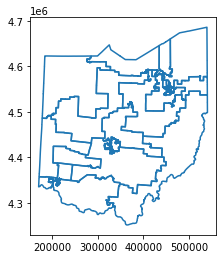

In [99]:
congressional_districts.boundary.plot()

In [100]:
congressional_districts.sample(3)

,ID,ID1,AREA,DISTRICT,MEMBERS,LOCKED,NAME,TOTPOP,POPULATION,DEVIATION,F_DEVIATIO,F_POPULATI,AGF_LINK,geometry
1,2,2,3248.71,02,1.0,None,None,721031,721031,-1.0,0.0,1.0,0000000002,"POLYGON ((197339.848 4352584.798, 197539.977 4..."
12,13,13,920.12,13,1.0,None,None,721031,721031,-1.0,0.0,1.0,0000000013,"POLYGON ((457485.444 4542107.399, 457556.268 4..."
7,8,8,2463.51,08,1.0,None,None,721032,721032,0.0,0.0,1.0,0000000008,"POLYGON ((170643.825 4357600.207, 170720.162 4..."


In [101]:
congressional_districts.set_index('DISTRICT', inplace = True)

In [102]:
congressional_districts.sort_index(inplace = True)

In [103]:
congressional_districts.tail(3)

,ID,ID1,AREA,MEMBERS,LOCKED,NAME,TOTPOP,POPULATION,DEVIATION,F_DEVIATIO,F_POPULATI,AGF_LINK,geometry
DISTRICT,,,,,,,,,,,,,
14,14,14,3390.47,1.0,None,None,721032,721032,0.0,0.0,1.0,0000000014,"POLYGON ((459297.303 4609375.750, 459238.104 4..."
15,15,15,4772.79,1.0,None,None,721031,721031,-1.0,0.0,1.0,0000000015,"POLYGON ((320997.324 4419560.112, 321058.945 4..."
16,16,16,1215.77,1.0,None,None,721031,721031,-1.0,0.0,1.0,0000000016,"POLYGON ((428422.653 4578417.330, 428482.984 4..."


In [104]:
assignments = maup.assign(precincts, congressional_districts)

In [105]:
assignments.unique()

array(['02', '04', '07', '14', '15', '06', '08', '09', '11', '16', '05',
       '12', '10', '03', '01', '13'], dtype=object)

In [106]:
# Assign the CDs to the precincts shapefile
precincts["CONGRESSIONAL_DISTRICTS"] = assignments

In [107]:
# Confirm what it looks like and that the HD assignment is correct by looking up some counties
precincts.sample()

,CNTYFIPS,COUNTY,CODE,PRECINCT,PRENAME,geometry,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,...,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,SEN_DIST,H_DIST,CONGRESSIONAL_DISTRICTS
PRECODE,,,,,,,,,,,,,,,,,,,,,
035-APY,035,Cuyahoga,APY,CLEVELAND-06-N,CLEVELAND-06-N,"POLYGON ((449718.408 4593163.843, 449679.012 4...",1208.262076,7.004014,1172.308196,0.996715,...,6.009454,673.328221,0.002617,0.0,0.0,0.0,3.01565,021,011,11


In [108]:
overlap = precincts.merge(mggg_final_shp, how = 'left', on = 'PRECODE')

In [109]:
overlap.head(1)

,PRECODE,CNTYFIPS_x,COUNTY_x,CODE_x,PRECINCT_x,PRENAME_x,geometry_x,TOTPOP_x,NH_WHITE_x,NH_BLACK_x,...,BVAP_y,AMINVAP_y,ASIANVAP_y,NHPIVAP_y,OTHERVAP_y,2MOREVAP_y,CD,SEND,HDIST,geometry_y
0,001-AAA,001,Adams,AAA,Bratton Township,BRATTON TOWNSHIP,"POLYGON ((291287.968 4317229.468, 291132.191 4...",1461.0,1417.0,1.0,...,0.0,9.0,3.0,0.0,0.0,11.0,02,014,090,"POLYGON ((291287.968 4317229.468, 291132.191 4..."


In [110]:
overlap[['CONGRESSIONAL_DISTRICTS', 'CD']].assign(NOTEQUAL=overlap.CONGRESSIONAL_DISTRICTS != overlap.CD)['NOTEQUAL'].sum()

1

In [111]:
ne = overlap[['PRECODE','PRECINCT_x','PRENAME_x','COUNTY_x','CONGRESSIONAL_DISTRICTS', 'CD']].assign(NOTEQUAL=overlap.CONGRESSIONAL_DISTRICTS != overlap.CD)
ne.loc[ne['NOTEQUAL'] == True]


,PRECODE,PRECINCT_x,PRENAME_x,COUNTY_x,CONGRESSIONAL_DISTRICTS,CD,NOTEQUAL
2636,049-ABZ,COLUMBUS 10-A,COLS 10-A,Franklin,15,03,True


Only off by one precinct. 

Alright so again - Justin Levitt's file was the one to go with. And was not able to find any of the 3 boundary files on the OH SOS website. 

<a name="electionresults"></a>

# Election Results


For the following candidates, only 2016 races: 
- President (Republican, Democrat, Libertarian, Green)
- U.S. Senate (Republican, Democrat)
- U.S. House (Republican, Democrat)
- State Senate (Republican, Democrat)
- State House (Republican, Democrat)

MGGG says they use both OH SOS data and MEDSL data, but don't specify where they use which one. Loading both in and then will try joining on both or a combination. 

## MEDSL Election Results

### Reading in 2016 State House and Senate Results

In [112]:
precinct_election_data = pd.read_csv("./raw-from-source/medsl/medsl_state_precincts_2016/2016-precinct-state.csv", 
                                     encoding='ISO-8859-1',
                                     dtype = {"county_name" : "str","precinct" : "str","district" : "str", "county_fips": "str"},
                                     usecols = ['state_fips','county_name','county_fips','jurisdiction','precinct','candidate',
                                                 'candidate_normalized','office','district','writein','party','mode','votes']
                                    )

Filter to only OH results for the races we need, because MEDSL election results are national

In [113]:
medsl_state_election_results = precinct_election_data[(precinct_election_data.state_fips == 39) & ( (precinct_election_data.office == 'State House') | (precinct_election_data.office == 'State Senate'))]

In [114]:
medsl_state_election_results.groupby('office').sum()

,state_fips,writein,votes
office,,,
State House,62750493,44875.0,4845958
State Senate,10401222,8975.0,2462331


### Reading in 2016 Presidential Results

In [115]:
precinct_election_data = pd.read_csv("./raw-from-source/medsl/medsl_presidential_2016/2016-precinct-president.csv", 
                                     encoding='ISO-8859-1',
                                     dtype = {"county_name" : "str","precinct" : "str","district" : "str", "county_fips": "str"},
                                    usecols = ['state_fips','county_name','county_fips','jurisdiction','precinct','candidate',
                                                 'candidate_normalized','office','district','writein','party','mode','votes'],
                                    low_memory=False)

Filter to only OH results for the races we need, because MEDSL election results are national

In [116]:
medsl_pres_election_results = precinct_election_data[(precinct_election_data.state_fips == 39)]

In [117]:
medsl_pres_election_results.groupby('office').sum()

,state_fips,writein,votes
office,,,
US President,1794741,1584.0,5496487


Confirmed on google that this is the correct number of U.S. presidential votes in Ohio in 2016 

In [118]:
medsl_pres_election_results.groupby('party').sum()

,state_fips,writein,votes
party,,,
democratic,346593,False,2394164
green,346593,False,46271
republican,346593,False,2841005


### Reading in 2016 U.S. Senate Results

In [119]:
precinct_election_data = pd.read_csv("./raw-from-source/medsl/medsl_us_senate_2016/2016-precinct-senate.csv", 
                                     encoding='ISO-8859-1',
                                     dtype = {"county_name" : "str","precinct" : "str","district" : "str", "county_fips": "str"},
                                    usecols = ['state_fips','county_name','county_fips','jurisdiction','precinct','candidate',
                                                 'candidate_normalized','office','district','writein','party','mode','votes'],
                                    low_memory=False)

Filter to only OH results for the races we need, because MEDSL election results are national

In [120]:
medsl_ussen_election_results = precinct_election_data[(precinct_election_data.state_fips == 39)]

In [121]:
medsl_ussen_election_results.groupby('office').sum()

,state_fips,writein,votes
office,,,
US Senate,2082990,8975.0,5374164


### Reading in 2016 U.S. House Results

In [122]:
precinct_election_data = pd.read_csv("./raw-from-source/medsl/medsl_us_house_2016/2016-precinct-house.csv", 
                                     encoding='ISO-8859-1',
                                     dtype = {"county_name" : "str","precinct" : "str","district" : "str", "county_fips": "str"},
                                    usecols = ['state_fips','county_name','county_fips','jurisdiction','precinct','candidate',
                                                 'candidate_normalized','office','district','writein','party','mode','votes'],
                                    low_memory=False)

In [123]:
medsl_ushouse_election_results = precinct_election_data[(precinct_election_data.state_fips == 39)]

In [124]:
medsl_ushouse_election_results.groupby('office').sum()

,state_fips,writein,votes
office,,,
US House,15277548,71800.0,5218355


In [125]:
medsl_ushouse_election_results.head(3)

,state_fips,county_name,county_fips,jurisdiction,precinct,candidate,candidate_normalized,office,district,writein,party,mode,votes
578079,39,Adams County,39001,Adams,JEFFERSON TOWNSHIP,Mike Turner,turner,US House,10,False,republican,total,0
578080,39,Adams County,39001,Adams,JEFFERSON TOWNSHIP,John Adams,adams,US House,3,False,republican,total,0
578081,39,Adams County,39001,Adams,JEFFERSON TOWNSHIP,Ed Albertson,albertson,US House,12,False,democratic,total,0


### Combining MEDSL Election Results

In [126]:
medsl_election_results = pd.concat([medsl_state_election_results, medsl_pres_election_results, 
                                    medsl_ussen_election_results, medsl_ushouse_election_results])

In [127]:
medsl_election_results.groupby('office').sum()

,state_fips,writein,votes
office,,,
State House,62750493,44875.0,4845958
State Senate,10401222,8975.0,2462331
US House,15277548,71800.0,5218355
US President,1794741,1584.0,5496487
US Senate,2082990,8975.0,5374164


In [128]:
medsl_election_results.groupby(['office','party']).sum()

state_fips  writein    votes
office       party                                   
State House  democratic    27727440    False  1961329
             green           346593    False     3857
             republican    31539963    False  2836624
State Senate democratic     4505709    False   821822
             republican     5545488    False  1640498
US House     democratic     5545488    False  2154523
             green           693186    False    27353
             republican     5545488    False  2996017
US President democratic      346593    False  2394164
             green           346593    False    46271
             republican      346593    False  2841005
US Senate    democratic      346593    False  1996908
             green           346593    False    88246
             republican      346593    False  3118567

Interesting that there's no libertarian votes, since those are in the MGGG file. I think we should re-assign the Gary Johnson votes as party libertarian, since he was officially registered Libertarian - MEDSL just isn't marking it down as libertarian

In [129]:
medsl_election_results.head(3)

,state_fips,county_name,county_fips,jurisdiction,precinct,candidate,candidate_normalized,office,district,writein,party,mode,votes
4577680,39,Adams County,39001,Adams,JEFFERSON TOWNSHIP,Rick Smith,smith,State House,54,False,democratic,total,0
4577681,39,Adams County,39001,Adams,JEFFERSON TOWNSHIP,John Patterson,patterson,State House,99,False,democratic,total,0
4577682,39,Adams County,39001,Adams,JEFFERSON TOWNSHIP,Joe Miller,miller,State House,9,False,republican,total,0


In [130]:
medsl_election_results.loc[medsl_election_results['candidate'] == 'Gary Johnson', 'party'] = 'libertarian' 

In [131]:
medsl_election_results.groupby(['office','party']).sum()

state_fips  writein    votes
office       party                                    
State House  democratic     27727440    False  1961329
             green            346593    False     3857
             republican     31539963    False  2836624
State Senate democratic      4505709    False   821822
             republican      5545488    False  1640498
US House     democratic      5545488    False  2154523
             green            693186    False    27353
             republican      5545488    False  2996017
US President democratic       346593    False  2394164
             green            346593    False    46271
             libertarian      346593    False   174498
             republican       346593    False  2841005
US Senate    democratic       346593    False  1996908
             green            346593    False    88246
             republican       346593    False  3118567

Confirmed that this is the right number of votes for Johnson.

### Pivoting MEDSL Election Results

Pivot the table by county and precinct

In [132]:
medsl_election_results_pivot = medsl_election_results.pivot_table(index = ['county_name','county_fips','precinct'],
                         columns = ['office','party'],
                        values = ['votes'],
                         aggfunc = 'sum').reset_index()

Testing out dataset, investigating

In [133]:
medsl_election_results_pivot.head(3)

county_name county_fips              precinct       votes        \
office                                                 State House         
party                                                   democratic green   
0       Adams County       39001      BRATTON TOWNSHIP           0     0   
1       Adams County       39001  BRUSH CREEK TOWNSHIP           0     0   
2       Adams County       39001        GREEN TOWNSHIP           0     0   

                                                                       \
office            State Senate              US House                    
party  republican   democratic republican democratic green republican   
0             527          117        487         82     0        543   
1             375          104        345         83     0        382   
2             168           74        149         67     0        161   

                                                                              
office US President                               US Senate                   
party    democratic green libertarian republican democratic green republican  
0                96     4          12        532         80     6        532  
1                95     0           9        390         93     6        358  
2                76     1           2        176         69     4        169

In [134]:
medsl_election_results_pivot.columns

MultiIndex([('county_name',             '',            ''),
            ('county_fips',             '',            ''),
            (   'precinct',             '',            ''),
            (      'votes',  'State House',  'democratic'),
            (      'votes',  'State House',       'green'),
            (      'votes',  'State House',  'republican'),
            (      'votes', 'State Senate',  'democratic'),
            (      'votes', 'State Senate',  'republican'),
            (      'votes',     'US House',  'democratic'),
            (      'votes',     'US House',       'green'),
            (      'votes',     'US House',  'republican'),
            (      'votes', 'US President',  'democratic'),
            (      'votes', 'US President',       'green'),
            (      'votes', 'US President', 'libertarian'),
            (      'votes', 'US President',  'republican'),
            (      'votes',    'US Senate',  'democratic'),
            (      'votes',    'US Senat

In [135]:
medsl_election_results_pivot.columns = ['county_name','county_fips','precinct',
                                        'STH16D','STH16G','STH16R',
                                        'SSEN16D','SSEN16R',
                                        'USH16D','USH16G','USH16R',
                                        'PRES16D','PRES16G','PRES16L','PRES16R',
                                        'SEN16D','SEN16G','SEN16R']

In [136]:
medsl_election_results_pivot.drop(columns=['SEN16G','USH16G','STH16G'], inplace = True)

In [137]:
medsl_election_results_pivot.head()

,county_name,county_fips,precinct,STH16D,STH16R,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
0,Adams County,39001,BRATTON TOWNSHIP,0,527,117,487,82,543,96,4,12,532,80,532
1,Adams County,39001,BRUSH CREEK TOWNSHIP,0,375,104,345,83,382,95,0,9,390,93,358
2,Adams County,39001,GREEN TOWNSHIP,0,168,74,149,67,161,76,1,2,176,69,169
3,Adams County,39001,JEFFERSON TOWNSHIP,0,243,90,219,82,247,73,2,8,258,86,239
4,Adams County,39001,LIBERTY NORTH,0,282,87,259,68,290,81,2,7,290,68,291


In [138]:
medsl_election_results_pivot.sum()

county_name    Adams CountyAdams CountyAdams CountyAdams Coun...
county_fips    3900139001390013900139001390013900139001390013...
precinct       BRATTON TOWNSHIPBRUSH CREEK TOWNSHIPGREEN TOWN...
STH16D                                                   1961329
STH16R                                                   2836624
SSEN16D                                                   821822
SSEN16R                                                  1640498
USH16D                                                   2154523
USH16R                                                   2996017
PRES16D                                                  2394164
PRES16G                                                    46271
PRES16L                                                   174498
PRES16R                                                  2841005
SEN16D                                                   1996908
SEN16R                                                   3118567
dtype: object

Confirm that the sums are good after concatenating, pivoting, renaming columns... lots of room for error here

In [139]:
medsl_state_election_results.groupby(['office','party']).sum()

state_fips  writein    votes
office       party                                   
State House  democratic    27727440    False  1961329
             green           346593    False     3857
             republican    31539963    False  2836624
State Senate democratic     4505709    False   821822
             republican     5545488    False  1640498

In [140]:
medsl_pres_election_results.groupby(['office','party']).sum()

state_fips  writein    votes
office       party                                   
US President democratic      346593    False  2394164
             green           346593    False    46271
             republican      346593    False  2841005

In [141]:
medsl_ussen_election_results.groupby(['office','party']).sum()

state_fips  writein    votes
office    party                                   
US Senate democratic      346593    False  1996908
          green           346593    False    88246
          republican      346593    False  3118567

In [142]:
medsl_ushouse_election_results.groupby(['office','party']).sum()

state_fips  writein    votes
office   party                                   
US House democratic     5545488    False  2154523
         green           693186    False    27353
         republican     5545488    False  2996017

They all look good! 

In [143]:
medsl_election_results_pivot.shape

(8887, 15)

In [144]:
precincts.shape

(8882, 27)

Only 5 more rows in MEDSL's results than in precinct shapefile. Seems pretty good

## SOS Election Results

The file is `secretary_of_state_precinct.xlsx`. The formatting would take a lot of processing, so going to see how well the MEDSL results join first. 

<a name="joining"></a>

# Joining Election Results

## Joining MEDSL Election Results

In [145]:
medsl_election_results_pivot.head(3)

,county_name,county_fips,precinct,STH16D,STH16R,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
0,Adams County,39001,BRATTON TOWNSHIP,0,527,117,487,82,543,96,4,12,532,80,532
1,Adams County,39001,BRUSH CREEK TOWNSHIP,0,375,104,345,83,382,95,0,9,390,93,358
2,Adams County,39001,GREEN TOWNSHIP,0,168,74,149,67,161,76,1,2,176,69,169


In [146]:
precincts.head(1)

,CNTYFIPS,COUNTY,CODE,PRECINCT,PRENAME,geometry,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,...,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,SEN_DIST,H_DIST,CONGRESSIONAL_DISTRICTS
PRECODE,,,,,,,,,,,,,,,,,,,,,
001-AAA,001,Adams,AAA,Bratton Township,BRATTON TOWNSHIP,"POLYGON ((291287.968 4317229.468, 291132.191 4...",1461.0,1417.0,1.0,10.0,...,1059.0,0.0,9.0,3.0,0.0,0.0,11.0,014,090,02


Remove the state fips from the MEDSL county fips columns

In [147]:
medsl_election_results_pivot['county_fips'] = medsl_election_results_pivot['county_fips'].str[2:]

### Join Attempt #1

In [148]:
df_joined = precincts.merge(medsl_election_results_pivot, how = 'outer'
                            , left_on = ['CNTYFIPS','PRENAME'], right_on = ['county_fips','precinct']
                            , indicator = True)

In [149]:
df_joined.groupby('_merge').count()

,CNTYFIPS,COUNTY,CODE,PRECINCT,PRENAME,geometry,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,...,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,53,53,53,53,53,53,53,53,53,53,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,58,58,58,58,58,58,58,58,58,58
both,8829,8829,8829,8829,8829,8829,8829,8829,8829,8829,...,8829,8829,8829,8829,8829,8829,8829,8829,8829,8829


In [150]:
8829 + 53 + 58

8940

Reminder: 8887 precincts in the MEDSL file, 8882 in the MGGG file

See what is not matching: 

In [151]:
df_joined.loc[df_joined['_merge'] != 'both'][['CNTYFIPS','COUNTY','PRECINCT','PRENAME','county_fips','precinct']].sample(5)

,CNTYFIPS,COUNTY,PRECINCT,PRENAME,county_fips,precinct
8882,NaN,NaN,NaN,NaN,001,LIBERTY NORTH
8898,NaN,NaN,NaN,NaN,139,MAN 1 - F
6907,139,Richland,MAN 2 - A,MAN 2,NaN,NaN
8937,NaN,NaN,NaN,NaN,171,PRECINCT BRYAN D - WD3
2189,037,Darke,VERSAILLES A,PRECINCT VERSAILLES VILLAGE,NaN,NaN


Ok so looks like there's some issues with Richland County. How many that didn't merge are in Richland? 

In [156]:
df_joined.loc[df_joined['_merge'] != 'both'].groupby('COUNTY').sum()

,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,VAP,...,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
COUNTY,,,,,,,,,,,,,,,,,,,,,
Adams,3747.000000,3631.000000,9.000000,19.000000,6.000000,0.000000,2.000000,31.000000,49.000000,2746.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Darke,4757.608459,4691.189014,8.931208,3.038719,4.008318,0.000000,1.000000,26.441099,23.000101,3507.360512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Richland,63356.784414,49162.249887,10764.978023,115.253005,530.680590,23.010829,114.973692,1514.997198,1130.641191,49969.579186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Williams,8459.114322,7783.225379,47.022229,9.697018,70.898543,3.968931,4.992945,108.264657,431.044621,6459.323690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
df_joined.loc[df_joined['_merge'] != 'both'].groupby('county_name').sum()

,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,VAP,...,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
county_name,,,,,,,,,,,,,,,,,,,,,
Adams County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,380.0,1033.0,299.0,1172.0,334.0,10.0,29.0,1177.0,316.0,1166.0
Darke County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1141.0,364.0,2008.0,418.0,12.0,79.0,2025.0,355.0,2082.0
Jackson County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,198.0,554.0,201.0,6.0,30.0,599.0,215.0,569.0
Mahoning County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,121.0,220.0,134.0,9.0,14.0,213.0,124.0,206.0
Richland County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8627.0,14355.0,8190.0,13760.0,9166.0,214.0,783.0,14069.0,8392.0,14416.0
Williams County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,979.0,2652.0,1230.0,48.0,140.0,2249.0,966.0,2464.0


#### Richland County

For Richland county, looks like the join should be on `PRECINCT` instead of `PRENAME` in the shapefile. 

In [158]:
df_joined.loc[(df_joined['_merge'] == 'left_only') & \
              ((df_joined['COUNTY'] == 'Richland') | \
               (df_joined['county_name'] == 'Richland County'))][['CNTYFIPS','COUNTY','PRECINCT','PRENAME','county_fips','precinct']].sample(10)

,CNTYFIPS,COUNTY,PRECINCT,PRENAME,county_fips,precinct
6919,139,Richland,MAN 4 - B,MAN 4,NaN,NaN
6912,139,Richland,MAN 2 - F,MAN 2,NaN,NaN
6923,139,Richland,MAN 5 - A,MAN 5,NaN,NaN
6922,139,Richland,MAN 4 - E,MAN 4,NaN,NaN
6914,139,Richland,MAN 3 - B,MAN 3,NaN,NaN
6910,139,Richland,MAN 2 - D,MAN 2,NaN,NaN
6930,139,Richland,SHL 1 - A,SHL 1,NaN,NaN
6907,139,Richland,MAN 2 - A,MAN 2,NaN,NaN
6924,139,Richland,MAN 5 - B,MAN 5,NaN,NaN
6966,139,Richland,ONT 4 - A,ONT 4,NaN,NaN


Make the changes on a new precinct join column in the shapefile

In [159]:
precincts['PRECINCT_NEW'] = precincts['PRENAME']

In [160]:
precincts.loc[(precincts['COUNTY'] == 'Richland') & ((precincts['PRECINCT'].str.contains('MAN')) | \
                                                     precincts['PRECINCT'].str.contains('SHL') | \
                                                     precincts['PRECINCT'].str.contains('ONT')), 'PRECINCT_NEW'] = precincts['PRECINCT']

#### Darke County

For Darke County, juts a few manual changes to make to the `PRENAME`

In [161]:
df_joined.loc[(df_joined['_merge'] != 'both') & \
              ((df_joined['COUNTY'] == 'Darke') | \
               (df_joined['county_name'] == 'Darke County'))][['CNTYFIPS','COUNTY','PRECINCT','PRENAME','county_fips','precinct']]

,CNTYFIPS,COUNTY,PRECINCT,PRENAME,county_fips,precinct
2189,037,Darke,VERSAILLES A,PRECINCT VERSAILLES VILLAGE,NaN,NaN
2190,037,Darke,VERSAILLES B,PRECINCT VERSAILLES VILLAGE,NaN,NaN
2204,037,Darke,ARCANUM A,PRECINCT ARCANUM VILLAGE,NaN,NaN
2205,037,Darke,Arcanum B,PRECINCT ARCANUM VILLAGE,NaN,NaN
8886,NaN,NaN,NaN,NaN,037,PRECINCT ARCANUM VILLAGE - A
8887,NaN,NaN,NaN,NaN,037,PRECINCT ARCANUM VILLAGE - B
8888,NaN,NaN,NaN,NaN,037,PRECINCT VERSAILLES VILLAGE - A
8889,NaN,NaN,NaN,NaN,037,PRECINCT VERSAILLES VILLAGE - B


In [162]:
precincts.loc[(precincts.COUNTY == 'Darke') & (precincts.PRECINCT == 'VERSAILLES A'), 'PRECINCT_NEW'] = 'PRECINCT VERSAILLES VILLAGE - A'
precincts.loc[(precincts.COUNTY == 'Darke') & (precincts.PRECINCT == 'VERSAILLES B'), 'PRECINCT_NEW'] = 'PRECINCT VERSAILLES VILLAGE - B'
precincts.loc[(precincts.COUNTY == 'Darke') & (precincts.PRECINCT == 'ARCANUM A'), 'PRECINCT_NEW'] = 'PRECINCT ARCANUM VILLAGE - A'
precincts.loc[(precincts.COUNTY == 'Darke') & (precincts.PRECINCT == 'Arcanum B'), 'PRECINCT_NEW'] = 'PRECINCT ARCANUM VILLAGE - B'

#### Adams County

Adams County mismatches are tricky - looks like the election results has results reporting for two locations in each of the precincts. Should aggregate these results. 

In [163]:
df_joined.loc[(df_joined['_merge'] != 'both') & \
              ((df_joined['COUNTY'] == 'Adams') | \
               (df_joined['county_name'] == 'Adams County'))][['CNTYFIPS','COUNTY','PRECINCT','PRENAME','county_fips','precinct']]

,CNTYFIPS,COUNTY,PRECINCT,PRENAME,county_fips,precinct
4,001,Adams,Liberty Township,LIBERTY TOWNSHIP,NaN,NaN
10,001,Adams,Peebles Village,PEEBLES VILLAGE,NaN,NaN
8882,NaN,NaN,NaN,NaN,001,LIBERTY NORTH
8883,NaN,NaN,NaN,NaN,001,LIBERTY SOUTH
8884,NaN,NaN,NaN,NaN,001,PEEBLES EAST
8885,NaN,NaN,NaN,NaN,001,PEEBLES WEST


In [164]:
medsl_election_results_pivot.loc[(medsl_election_results_pivot.county_fips == '001') & \
                                ((medsl_election_results_pivot.precinct.str.contains('LIBERTY')) | \
                                 (medsl_election_results_pivot.precinct.str.contains('PEEBLES')))]

,county_name,county_fips,precinct,STH16D,STH16R,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
4,Adams County,001,LIBERTY NORTH,0,282,87,259,68,290,81,2,7,290,68,291
5,Adams County,001,LIBERTY SOUTH,0,398,104,365,74,407,87,4,13,394,86,389
11,Adams County,001,PEEBLES EAST,0,258,87,207,66,242,80,1,1,250,75,241
12,Adams County,001,PEEBLES WEST,0,247,102,202,91,233,86,3,8,243,87,245


In [165]:
medsl_election_results_pivot.columns

Index(['county_name', 'county_fips', 'precinct', 'STH16D', 'STH16R', 'SSEN16D',
       'SSEN16R', 'USH16D', 'USH16R', 'PRES16D', 'PRES16G', 'PRES16L',
       'PRES16R', 'SEN16D', 'SEN16R'],
      dtype='object')

In [166]:
temp = medsl_election_results_pivot.loc[(medsl_election_results_pivot.county_fips == '001') & \
                                ((medsl_election_results_pivot.precinct.str.contains('LIBERTY')))][['STH16D', 'STH16R', 'SSEN16D',
                                   'SSEN16R', 'USH16D', 'USH16R', 'PRES16D', 'PRES16G', 'PRES16L',
                                   'PRES16R', 'SEN16D', 'SEN16R']].sum()

In [167]:
temp = pd.DataFrame([['Adams County','001','LIBERTY TOWNSHIP'] + temp.tolist()], columns = medsl_election_results_pivot.columns.tolist())

In [168]:
temp

,county_name,county_fips,precinct,STH16D,STH16R,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
0,Adams County,001,LIBERTY TOWNSHIP,0,680,191,624,142,697,168,6,20,684,154,680


In [169]:
medsl_election_results_pivot = pd.concat([medsl_election_results_pivot,temp])

In [170]:
temp = medsl_election_results_pivot.loc[(medsl_election_results_pivot.county_fips == '001') & \
                                ((medsl_election_results_pivot.precinct.str.contains('PEEBLES')))][['STH16D', 'STH16R', 'SSEN16D',
                                   'SSEN16R', 'USH16D', 'USH16R', 'PRES16D', 'PRES16G', 'PRES16L',
                                   'PRES16R', 'SEN16D', 'SEN16R']].sum()

In [171]:
temp = pd.DataFrame([['Adams County','001','PEEBLES VILLAGE'] + temp.tolist()], columns = medsl_election_results_pivot.columns.tolist())

In [172]:
temp

,county_name,county_fips,precinct,STH16D,STH16R,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
0,Adams County,001,PEEBLES VILLAGE,0,505,189,409,157,475,166,4,9,493,162,486


In [173]:
medsl_election_results_pivot = pd.concat([medsl_election_results_pivot,temp])

In [174]:
medsl_election_results_pivot.reset_index(drop = True, inplace = True)

In [175]:
medsl_election_results_pivot.loc[(medsl_election_results_pivot.county_fips == '001') & \
                                ((medsl_election_results_pivot.precinct.str.contains('LIBERTY')) | \
                                 (medsl_election_results_pivot.precinct.str.contains('PEEBLES')))]

,county_name,county_fips,precinct,STH16D,STH16R,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
4,Adams County,001,LIBERTY NORTH,0,282,87,259,68,290,81,2,7,290,68,291
5,Adams County,001,LIBERTY SOUTH,0,398,104,365,74,407,87,4,13,394,86,389
11,Adams County,001,PEEBLES EAST,0,258,87,207,66,242,80,1,1,250,75,241
12,Adams County,001,PEEBLES WEST,0,247,102,202,91,233,86,3,8,243,87,245
8887,Adams County,001,LIBERTY TOWNSHIP,0,680,191,624,142,697,168,6,20,684,154,680
8888,Adams County,001,PEEBLES VILLAGE,0,505,189,409,157,475,166,4,9,493,162,486


In [176]:
medsl_election_results_pivot.drop([4,5,11,12], inplace = True)

In [177]:
medsl_election_results_pivot.loc[(medsl_election_results_pivot.county_fips == '001') & \
                                ((medsl_election_results_pivot.precinct.str.contains('LIBERTY')) | \
                                 (medsl_election_results_pivot.precinct.str.contains('PEEBLES')))]

,county_name,county_fips,precinct,STH16D,STH16R,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
8887,Adams County,001,LIBERTY TOWNSHIP,0,680,191,624,142,697,168,6,20,684,154,680
8888,Adams County,001,PEEBLES VILLAGE,0,505,189,409,157,475,166,4,9,493,162,486


Alright, we replaced those rows

#### Williams County

Pretty straightforward cleaning for Williams County mismatches

In [178]:
df_joined.loc[(df_joined['_merge'] != 'both') & \
              ((df_joined['COUNTY'] == 'Williams') | \
               (df_joined['county_name'] == 'Williams County'))][['CNTYFIPS','COUNTY','PRECINCT','PRENAME','county_fips','precinct']]

,CNTYFIPS,COUNTY,PRECINCT,PRENAME,county_fips,precinct
8604,171,Williams,Bryan A,PRECINCT BRYAN A,NaN,NaN
8605,171,Williams,Bryan B,PRECINCT BRYAN B,NaN,NaN
8606,171,Williams,Bryan C,PRECINCT BRYAN C,NaN,NaN
8607,171,Williams,Bryan D,PRECINCT BRYAN D,NaN,NaN
8608,171,Williams,Bryan E,PRECINCT BRYAN E,NaN,NaN
8615,171,Williams,Bryan F,PRECINCT BRYAN F,NaN,NaN
8934,NaN,NaN,NaN,NaN,171,PRECINCT BRYAN A - WD1
8935,NaN,NaN,NaN,NaN,171,PRECINCT BRYAN B - WD2
8936,NaN,NaN,NaN,NaN,171,PRECINCT BRYAN C - WD3
8937,NaN,NaN,NaN,NaN,171,PRECINCT BRYAN D - WD3


In [179]:
precincts.loc[(precincts.COUNTY == 'Williams') & (precincts.PRENAME == 'PRECINCT BRYAN A'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN A - WD1'
precincts.loc[(precincts.COUNTY == 'Williams') & (precincts.PRENAME == 'PRECINCT BRYAN B'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN B - WD2'
precincts.loc[(precincts.COUNTY == 'Williams') & (precincts.PRENAME == 'PRECINCT BRYAN C'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN C - WD3'
precincts.loc[(precincts.COUNTY == 'Williams') & (precincts.PRENAME == 'PRECINCT BRYAN D'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN D - WD3'
precincts.loc[(precincts.COUNTY == 'Williams') & (precincts.PRENAME == 'PRECINCT BRYAN E'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN E - WD4'
precincts.loc[(precincts.COUNTY == 'Williams') & (precincts.PRENAME == 'PRECINCT BRYAN F'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN F - WD4'

#### Jackson County

For Jackson county, the mismatches are only in the election results: 

In [180]:
df_joined.loc[(df_joined['_merge'] != 'both') & \
              ((df_joined['county_name'] == 'Jackson County'))][['CNTYFIPS','COUNTY','PRECINCT','PRENAME','county_fips','precinct']]

,CNTYFIPS,COUNTY,PRECINCT,PRENAME,county_fips,precinct
8890,NaN,NaN,NaN,NaN,079,PRECINCT MADISON II
8891,NaN,NaN,NaN,NaN,079,PRECINCT WELLSTON 2-B


In [181]:
df_joined.columns

Index(['CNTYFIPS', 'COUNTY', 'CODE', 'PRECINCT', 'PRENAME', 'geometry',
       'TOTPOP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI',
       'NH_OTHER', 'NH_2MORE', 'HISP', 'VAP', 'HVAP', 'WVAP', 'BVAP',
       'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'SEN_DIST',
       'H_DIST', 'CONGRESSIONAL_DISTRICTS', 'county_name', 'county_fips',
       'precinct', 'STH16D', 'STH16R', 'SSEN16D', 'SSEN16R', 'USH16D',
       'USH16R', 'PRES16D', 'PRES16G', 'PRES16L', 'PRES16R', 'SEN16D',
       'SEN16R', '_merge'],
      dtype='object')

In [182]:
df_joined.loc[(df_joined['county_name'] == 'Jackson County') & \
              ((df_joined['precinct'].str.contains('MADISON')) | \
               (df_joined['precinct'].str.contains('WELLSTON')))][['CNTYFIPS','COUNTY','PRECINCT',
                                                                   'PRENAME','county_fips','precinct','_merge','PRES16R']]

,CNTYFIPS,COUNTY,PRECINCT,PRENAME,county_fips,precinct,_merge,PRES16R
4530,079,Jackson,Wellston1a,PRECINCT WELLSTON 1-A,079,PRECINCT WELLSTON 1-A,both,303.0
4531,079,Jackson,Wellston2a,PRECINCT WELLSTON 2-A,079,PRECINCT WELLSTON 2-A,both,237.0
4532,079,Jackson,Wellston4a,PRECINCT WELLSTON 4-A,079,PRECINCT WELLSTON 4-A,both,339.0
8876,079,Jackson,Madison1,PRECINCT MADISON I,079,PRECINCT MADISON I,both,241.0
8877,079,Jackson,Wellston3a,PRECINCT WELLSTON 3-A,079,PRECINCT WELLSTON 3-A,both,200.0
8890,NaN,NaN,NaN,NaN,079,PRECINCT MADISON II,right_only,292.0
8891,NaN,NaN,NaN,NaN,079,PRECINCT WELLSTON 2-B,right_only,307.0


Not an obvious change to make for Jackson county mismatches, but we can try aggregating `PRECINCT WELLSTON 2-A` and `PRECINCT WELLSTON 2-B` results, and `PRECINCT MADISON I` and `PRECINCT MADISON II` results. 

Check if this is what MGGG's vote totals look like before aggregating: 

In [183]:
mggg_final_shp[(mggg_final_shp.COUNTY == 'Jackson') & \
               (mggg_final_shp.PRENAME.str.contains('WELLSTON') | \
                mggg_final_shp.PRENAME.str.contains('MADISON'))]

,CNTYFIPS,COUNTY,CODE,PRECODE,PRECINCT,PRENAME,TOTREG16,TOTVOTE16,TURNOUT16,PRES16R,...,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,CD,SEND,HDIST,geometry
4526,079,Jackson,AAJ,079-AAJ,Wellston1a,PRECINCT WELLSTON 1-A,654,429,0.655963,303,...,1.0,3.0,2.0,0.0,0.0,5.0,06,017,093,"POLYGON ((367537.209 4331073.062, 367429.046 4..."
4527,079,Jackson,AAL,079-AAL,Wellston2a,PRECINCT WELLSTON 2-A,635,337,0.530709,237,...,0.0,4.0,2.0,0.0,0.0,5.0,06,017,093,"POLYGON ((367225.114 4330608.083, 367201.806 4..."
4528,079,Jackson,AAQ,079-AAQ,Wellston4a,PRECINCT WELLSTON 4-A,883,534,0.604757,339,...,1.0,7.0,2.0,0.0,1.0,9.0,06,017,093,"POLYGON ((365841.242 4328347.169, 365782.345 4..."
8871,079,Jackson,ABG,079-ABG,Madison1,PRECINCT MADISON I,473,302,0.638478,241,...,5.0,4.0,1.0,0.0,0.0,6.0,06,017,093,"POLYGON ((370108.381 4301011.514, 369905.377 4..."
8872,079,Jackson,AAM,079-AAM,Wellston3a,PRECINCT WELLSTON 3-A,742,490,0.660377,307,...,8.0,5.0,4.0,0.0,0.0,13.0,06,017,093,"MULTIPOLYGON (((367956.244 4330202.099, 367857..."


So it does not look like MGGG combined those columns. 

Good to note that the votes for `PRECINCT MADISON II` and `PRECINCT WELLSTON 2-B` in Jackson County are missing because we don't have geographies for them. 

#### Mahoning County

Checking out Mahoning county ones that didn't join: 

In [184]:
df_joined.loc[(df_joined['_merge'] != 'both') & \
              ((df_joined['county_name'] == 'Mahoning County'))][['CNTYFIPS','COUNTY','PRECINCT','PRENAME','county_fips','precinct']]

,CNTYFIPS,COUNTY,PRECINCT,PRENAME,county_fips,precinct
8892,NaN,NaN,NaN,NaN,099,PRECINCT SBC 4


In [185]:
df_joined.loc[(df_joined['county_name'] == 'Mahoning County') & \
              ((df_joined['precinct'].str.contains('SBC')))][['CNTYFIPS','COUNTY','PRECINCT','PRENAME','county_fips','precinct','_merge']]

,CNTYFIPS,COUNTY,PRECINCT,PRENAME,county_fips,precinct,_merge
5660,099,Mahoning,Sebring 2,PRECINCT SBC 2,099,PRECINCT SBC 2,both
5661,099,Mahoning,Sebring 3,PRECINCT SBC 3,099,PRECINCT SBC 3,both
5664,099,Mahoning,Sebring 1,PRECINCT SBC 1,099,PRECINCT SBC 1,both
8892,NaN,NaN,NaN,NaN,099,PRECINCT SBC 4,right_only


There is not an obvious fix for Mahoning County SBC 4. Moving on

### Join Attempt #2

Try to join again now that those changes were made. 

In [186]:
df_joined = precincts.merge(medsl_election_results_pivot, how = 'outer'
                            , left_on = ['CNTYFIPS','PRECINCT_NEW'], right_on = ['county_fips','precinct']
                            , indicator = True)

In [187]:
df_joined.groupby('_merge').count()

,CNTYFIPS,COUNTY,CODE,PRECINCT,PRENAME,geometry,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,...,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
both,8882,8882,8882,8882,8882,8882,8882,8882,8882,8882,...,8882,8882,8882,8882,8882,8882,8882,8882,8882,8882


Reminder: 8887 precincts in the MEDSL file, 8882 in the MGGG file

See what is not matching: 

In [188]:
df_joined.loc[df_joined['_merge'] != 'both'][['CNTYFIPS','COUNTY','PRECINCT','PRENAME','PRECINCT_NEW','county_fips','precinct']].sample(3)

,CNTYFIPS,COUNTY,PRECINCT,PRENAME,PRECINCT_NEW,county_fips,precinct
8883,NaN,NaN,NaN,NaN,NaN,079,PRECINCT WELLSTON 2-B
8882,NaN,NaN,NaN,NaN,NaN,079,PRECINCT MADISON II
8884,NaN,NaN,NaN,NaN,NaN,099,PRECINCT SBC 4


Alright - this is what we expect! Moving on from join. Drop the columns that didn't join. 

In [189]:
df_joined.drop([8883,8882,8884], inplace = True)

In [190]:
df_joined.groupby('_merge').count()

,CNTYFIPS,COUNTY,CODE,PRECINCT,PRENAME,geometry,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,...,SSEN16D,SSEN16R,USH16D,USH16R,PRES16D,PRES16G,PRES16L,PRES16R,SEN16D,SEN16R
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,8882,8882,8882,8882,8882,8882,8882,8882,8882,8882,...,8882,8882,8882,8882,8882,8882,8882,8882,8882,8882


In [191]:
df_joined.drop(columns=['_merge'], inplace = True)

<a name="comparison"></a>

# Comparison to MGGG

## Join Final to MGGG

Make the necessecary changes to the final mggg shape to get things to join

In [192]:
mggg_final_shp['PRECINCT_NEW'] = mggg_final_shp['PRENAME']

In [193]:
mggg_final_shp.loc[(mggg_final_shp['COUNTY'] == 'Richland') & ((mggg_final_shp['PRECINCT'].str.contains('MAN')) | \
                                                     mggg_final_shp['PRECINCT'].str.contains('SHL') | \
                                                     mggg_final_shp['PRECINCT'].str.contains('ONT')), 'PRECINCT_NEW'] = mggg_final_shp['PRECINCT']

In [194]:
mggg_final_shp.loc[(mggg_final_shp.COUNTY == 'Darke') & (mggg_final_shp.PRECINCT == 'VERSAILLES A'), 'PRECINCT_NEW'] = 'PRECINCT VERSAILLES VILLAGE - A'
mggg_final_shp.loc[(mggg_final_shp.COUNTY == 'Darke') & (mggg_final_shp.PRECINCT == 'VERSAILLES B'), 'PRECINCT_NEW'] = 'PRECINCT VERSAILLES VILLAGE - B'
mggg_final_shp.loc[(mggg_final_shp.COUNTY == 'Darke') & (mggg_final_shp.PRECINCT == 'ARCANUM A'), 'PRECINCT_NEW'] = 'PRECINCT ARCANUM VILLAGE - A'
mggg_final_shp.loc[(mggg_final_shp.COUNTY == 'Darke') & (mggg_final_shp.PRECINCT == 'Arcanum B'), 'PRECINCT_NEW'] = 'PRECINCT ARCANUM VILLAGE - B'

In [195]:
mggg_final_shp.loc[(mggg_final_shp.COUNTY == 'Williams') & (mggg_final_shp.PRENAME == 'PRECINCT BRYAN A'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN A - WD1'
mggg_final_shp.loc[(mggg_final_shp.COUNTY == 'Williams') & (mggg_final_shp.PRENAME == 'PRECINCT BRYAN B'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN B - WD2'
mggg_final_shp.loc[(mggg_final_shp.COUNTY == 'Williams') & (mggg_final_shp.PRENAME == 'PRECINCT BRYAN C'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN C - WD3'
mggg_final_shp.loc[(mggg_final_shp.COUNTY == 'Williams') & (mggg_final_shp.PRENAME == 'PRECINCT BRYAN D'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN D - WD3'
mggg_final_shp.loc[(mggg_final_shp.COUNTY == 'Williams') & (mggg_final_shp.PRENAME == 'PRECINCT BRYAN E'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN E - WD4'
mggg_final_shp.loc[(mggg_final_shp.COUNTY == 'Williams') & (mggg_final_shp.PRENAME == 'PRECINCT BRYAN F'), 'PRECINCT_NEW'] = 'PRECINCT BRYAN F - WD4'

Join `df_joined` where `_merge == 'both'` to the MGGG final df

In [196]:
overlap = df_joined.merge(mggg_final_shp, how = 'outer'
                            , left_on = ['county_fips','PRECINCT_NEW'], right_on = ['CNTYFIPS','PRECINCT_NEW']
                            , indicator = True)

In [197]:
overlap.groupby('_merge').count()

,CNTYFIPS_x,COUNTY_x,CODE_x,PRECINCT_x,PRENAME_x,geometry_x,TOTPOP_x,NH_WHITE_x,NH_BLACK_x,NH_AMIN_x,...,BVAP_y,AMINVAP_y,ASIANVAP_y,NHPIVAP_y,OTHERVAP_y,2MOREVAP_y,CD,SEND,HDIST,geometry_y
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,8882,8882,8882,8882,8882,8882,8882,8882,8882,8882,...,8882,8882,8882,8882,8882,8882,8882,8882,8882,8882


## Validation

In [198]:
mggg_final_shp.shape

(8882, 51)

In [199]:
overlap.shape

(8882, 94)

We were able to join the full number of precincts (sort of expected, because the MGGG final shapefile uses precincts that MGGG themselves collected)

### Comparing Election Results

In [200]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            if(df.iloc[j][left_Data]-df.iloc[j][right_Data] != 0):
                same = False
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['county_fips'] + ' ' + df.iloc[j]["PRECINCT_NEW"])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print(diff_list)
    print("")

In [201]:
column_List = ['PRES16R', 'PRES16D', 'PRES16L', 'PRES16G',
       'SEN16R', 'SEN16D', 'USH16R', 'USH16D', 'SSEN16R',
       'SSEN16D', 'STH16D', 'STH16R']

In [202]:
validater_row(overlap,column_List)  

There are  8882  total rows
55  of these rows have election result differences
8827  of these rows are the same
['013 PRECINCT PULTNEY TWP 4 NEFFS', '013 PRECINCT PULTNEY TWP 1', '013 PRECINCT PULTNEY TWP 2', '013 PRECINCT PULTNEY TWP AVONDALE', '013 PRECINCT PEASE TWP 1', '013 PRECINCT COLERAIN TWP 6', '013 PRECINCT RICHLAND TWP 6', '013 PRECINCT RICHLAND TWP 3', '013 PRECINCT COLERAIN TWP 2', '013 PRECINCT COLERAIN TWP 5', '013 PRECINCT COLERAIN TWP 1', '013 PRECINCT PEASE TWP BLAINE WOLFHURST', '013 PRECINCT PEASE TWP BOYDSVILLE', '013 PRECINCT PEASE TWP 2', '013 PRECINCT RICHLAND TWP 2', '013 PRECINCT RICHLAND TWP 5', '057 SPG VLY TWP 436', '057 SPG VLY VLG 430', '057 SPG VLY TWP 435', '075 PRECINCT KILLBUCK TOWNSHIP', '075 PRECINCT KNOX TOWNSHIP', '075 PRECINCT MECHANIC TOWNSHIP', '075 PRECINCT MILLERSBURG EAST', '075 PRECINCT MILLERSBURG WEST', '079 PRECINCT WELLSTON 2-A', '087 PRECINCT LAWRENCE 2', '087 PRECINCT LAWRENCE 3', '087 PRECINCT LAWRENCE 1', '099 PRECINCT SBC 3', '119 

This is to check the MGGG OH file, vote totals and whether or not they match the data provided by MEDSL, regardless of whether we were able to match the particular precincts

In [205]:
#Checks the sums of different columns and prints out the 
def sum_checker (df1,df2, column_List):
    list_max = 0
    for i in column_List:
        df1_sum = df1[i].sum()
        df2_sum = df2[i].sum()
        if (df1_sum==df2_sum):
            print("Column: ", i, " have the same sums")
            
        else:
            diff = abs(df1_sum-df2_sum)
            percent = abs(((df1_sum-df2_sum)/df1_sum)*100)
            print("Column: ", i)
            print("DataFrame #1 sum is ", str(df1_sum))
            print("DataFrame #2 sum is ", str(df2_sum))
            print("Their (absolute) difference is ",str(diff))
            print("As a percentage of DF1 this is ", str(round(percent,5)))
            if (percent>list_max):
                list_max = percent
            print("")
    print("The max difference (as a percent of the total of one DF column) is: ", str(round(list_max,5)))

In [206]:
sum_checker(medsl_election_results_pivot,mggg_final_shp,column_List)

Column:  PRES16R
DataFrame #1 sum is  2841005
DataFrame #2 sum is  2840380
Their (absolute) difference is  625
As a percentage of DF1 this is  0.022

Column:  PRES16D
DataFrame #1 sum is  2394164
DataFrame #2 sum is  2393911
Their (absolute) difference is  253
As a percentage of DF1 this is  0.01057

Column:  PRES16L
DataFrame #1 sum is  174498
DataFrame #2 sum is  174473
Their (absolute) difference is  25
As a percentage of DF1 this is  0.01433

Column:  PRES16G
DataFrame #1 sum is  46271
DataFrame #2 sum is  46262
Their (absolute) difference is  9
As a percentage of DF1 this is  0.01945

Column:  SEN16R  have the same sums
Column:  SEN16D  have the same sums
Column:  USH16R  have the same sums
Column:  USH16D  have the same sums
Column:  SSEN16R  have the same sums
Column:  SSEN16D  have the same sums
Column:  STH16D  have the same sums
Column:  STH16R  have the same sums
The max difference (as a percent of the total of one DF column) is:  0.022


Ok, so they don't match entirely but the differences are very small. 

### Comparing Geometries

In [207]:
pdv_shapes_elections_and_shapes = gp.GeoDataFrame(overlap, geometry='geometry_x')
mggg_shapes_elections_and_shapes = gp.GeoDataFrame(overlap, geometry='geometry_y')

pdv_shapes_elections_and_shapes.crs=mggg_shapes_elections_and_shapes.crs

In [208]:
print(pdv_shapes_elections_and_shapes.geom_almost_equals(mggg_shapes_elections_and_shapes,decimal=1).value_counts())

True     8736
False     146
dtype: int64


From the above, 8736 precincts match to one decimal and 146 differ.

Interesting.. this is not what we would expect, because MGGG collect the precincts and they are both projected to UTM zone 17. On GitHub it appears as if they “Fix[ed] topology errors” in the file in June 26th, 2020, which may explain why there are some minor differences.

In [209]:
s = pdv_shapes_elections_and_shapes.geom_almost_equals(mggg_shapes_elections_and_shapes,decimal=1)
s

0       True
1       True
2       True
3       True
4       True
        ... 
8877    True
8878    True
8879    True
8880    True
8881    True
Length: 8882, dtype: bool

In [210]:
s[s != True]

14      False
17      False
23      False
111     False
112     False
        ...  
8646    False
8653    False
8674    False
8768    False
8787    False
Length: 146, dtype: bool

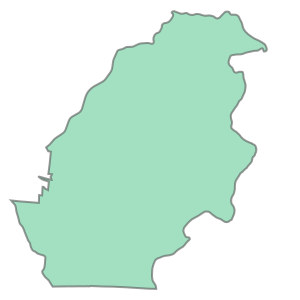

In [211]:
pdv_shapes_elections_and_shapes.loc[14]['geometry_x']

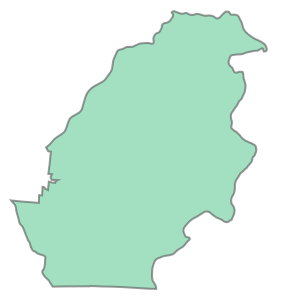

In [212]:
mggg_shapes_elections_and_shapes.loc[14]['geometry_y']

So in this example, we can see that there are actual differences in the geometries. 

### Comparing Demographics

In [213]:
import math

def match(row, mggg_col, prec_col):
    mggg_value = row[mggg_col]
    prec_value = row[prec_col]
    
    return math.ceil(mggg_value) == prec_value or math.floor(mggg_value) == prec_value

In [214]:
demo_variables = ['TOTPOP','NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 
             'NH_NHPI', 'NH_OTHER','NH_2MORE', 'HISP', 'VAP', 'HVAP', 
             'WVAP', 'BVAP', 'AMINVAP','ASIANVAP', 'NHPIVAP', 'OTHERVAP', 
             '2MOREVAP'] 

for demo in demo_variables: 
    print('~~~~ ' + demo)
    overlap[demo + '_x'] = overlap[demo + '_x'].round()
    print(overlap.apply(lambda row: match(row, demo + '_y', demo + '_x'), axis=1).value_counts())
    print('pct precincts w deviation < 10: ', overlap[((overlap[demo + '_x'] - overlap[demo + '_y']).abs() < 10) & (overlap['_merge'] == 'both')].shape[0] / overlap[overlap['_merge'] == 'both'].shape[0])
    print('pct precincts w deviation < 100: ', overlap[((overlap[demo + '_x'] - overlap[demo + '_y']).abs() < 100) & (overlap['_merge'] == 'both')].shape[0] / overlap[overlap['_merge'] == 'both'].shape[0])


~~~~ TOTPOP
False    6273
True     2609
dtype: int64
pct precincts w deviation < 10:  0.6361179914433686
pct precincts w deviation < 100:  0.9169106057194326
~~~~ NH_WHITE
False    5882
True     3000
dtype: int64
pct precincts w deviation < 10:  0.6688808826840802
pct precincts w deviation < 100:  0.9344742175185768
~~~~ NH_BLACK
True     6099
False    2783
dtype: int64
pct precincts w deviation < 10:  0.9296329655482999
pct precincts w deviation < 100:  0.9935825264580049
~~~~ NH_AMIN
True     8566
False     316
dtype: int64
pct precincts w deviation < 10:  1.0
pct precincts w deviation < 100:  1.0
~~~~ NH_ASIAN
True     7276
False    1606
dtype: int64
pct precincts w deviation < 10:  0.9728664715154245
pct precincts w deviation < 100:  0.9996622382346319
~~~~ NH_NHPI
True     8826
False      56
dtype: int64
pct precincts w deviation < 10:  1.0
pct precincts w deviation < 100:  1.0
~~~~ NH_OTHER
True     8566
False     316
dtype: int64
pct precincts w deviation < 10:  1.0
pct precinct

Interesting that TOTPOP is not the same in all of the precincts. Look into this: 

In [215]:
overlap[(overlap.TOTPOP_x != overlap.TOTPOP_y)][['TOTPOP_x','TOTPOP_y']]

,TOTPOP_x,TOTPOP_y
5,1100.0,1106.0
14,1180.0,1142.0
17,1740.0,1729.0
21,788.0,793.0
22,1164.0,1159.0
...,...,...
8871,1975.0,1972.0
8872,2033.0,2039.0
8874,1691.0,1728.0
8875,1285.0,1276.0


In [216]:
overlap.TOTPOP_x.sum()

11540095.0

In [217]:
overlap.TOTPOP_y.sum()

11536487.0

So there's small differences in the demographic data, this is likely due to the way that we used maup compared to MGGG. Fine to explain in report that this is the case, but that it doesn't seem too concerning. 

### Comparing Legislative Boundaries

These were compared in the Legislative Boundaries section. 

The results of the comparison were as follows...

State Senate Districts:

In [218]:
ne = overlap[['PRECODE','PRECINCT_x','PRENAME_x','COUNTY_x','SEN_DIST', 'SEND']].assign(NOTEQUAL=overlap.SEN_DIST != overlap.SEND)
ne.loc[ne['NOTEQUAL'] == True]

,PRECODE,PRECINCT_x,PRENAME_x,COUNTY_x,SEN_DIST,SEND,NOTEQUAL
2420,043-ADX,SANDUSKY-A,PRECINCT SAN A,Erie,002,ZZZ,True
2779,049-AHX,COLUMBUS 38-B,COLS 38-B,Franklin,015,003,True
2854,049-AKR,COLUMBUS 50-C,COLS 50-C,Franklin,015,003,True


RDH is correct for Sandusky. Not sure about the Columbus precincts. 

State House Districts:

In [219]:
ne = overlap[['PRECODE','PRECINCT_x','PRENAME_x','COUNTY_x','H_DIST', 'HDIST']].assign(NOTEQUAL=overlap.H_DIST != overlap.HDIST)
ne.loc[ne['NOTEQUAL'] == True]

,PRECODE,PRECINCT_x,PRENAME_x,COUNTY_x,H_DIST,HDIST,NOTEQUAL
1876,035-CEF,NORTH OLMSTED-03-B,NORTH OLMSTED-03-B,Cuyahoga,016,007,True
2420,043-ADX,SANDUSKY-A,PRECINCT SAN A,Erie,089,ZZZ,True
2779,049-AHX,COLUMBUS 38-B,COLS 38-B,Franklin,018,017,True
2854,049-AKR,COLUMBUS 50-C,COLS 50-C,Franklin,026,017,True


Spot checked and RDH is correct for North Olmsted, Sandusky. Could be either one for Columbus because not sure where the Columbus precincts are in Columbus. 

Congressional Districts:

In [220]:
ne = overlap[['PRECODE','PRECINCT_x','PRENAME_x','COUNTY_x','CONGRESSIONAL_DISTRICTS', 'CD']].assign(NOTEQUAL=overlap.CONGRESSIONAL_DISTRICTS != overlap.CD)
ne.loc[ne['NOTEQUAL'] == True]

,PRECODE,PRECINCT_x,PRENAME_x,COUNTY_x,CONGRESSIONAL_DISTRICTS,CD,NOTEQUAL
2636,049-ABZ,COLUMBUS 10-A,COLS 10-A,Franklin,15,03,True


Again, not sure which is correct because both CDs are in parts of Columbus. 

## Validation Summary

We pulled the MGGG precinct shapefile from [mggg/ohio-precincts](https://github.com/mggg/ohio-precincts). They collected this shapefile. We did not spot check the actual shapefile because there would be too many differences from county to county, depending on if a county had a shapefile available online or if it was geo-referenced. 

We pulled election results from MEDSL and were able to join them completely to the shapefile, even though MGGG says they also use SOS election results. Not sure why they use SOS results, as they were not necessary. Though, this could explain differences in vote totals when comparing the election results. Moving on since they did not say where they used MEDSL vs SOS. 

Strangely, there are differences in the geometries of the precinct shapefile on [mggg/ohio-precincts](https://github.com/mggg/ohio-precincts) and on [mggg-states/oh-shapefiles](https://github.com/mggg-states/OH-shapefiles). From their GitHub, it seems like they fixed some topology issues at some point, but they did not document changes made. 

The demographic data does not match entirely, with many differences of 10-20 people between the RDH version and the MGGG version. Perhaps this is due to the different geometries, or due to the way that we used maup (with intersections and then assign). 

The legislative boundaries assignments are almost entirely the same, with a few exceptions. Again, likely due to changes in geometries that are not explained.